<a href="https://colab.research.google.com/github/marcelozanchetta/EDS104/blob/main/Lab8_Atividade_Dados_Exploratorios_Agrupamento_Metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratório 8 - Atividade 1**

Essa atividade busca explorar métricas para os algoritmos de agrupamento de dado com a Linguagem Python. **Essa atividade será desenvolvida em grupo com  três estudantes.**

* Com objetivo de avaliar o desempenho dos agrupamentos encontrados, uma medida de avaliação ou validação deve ser utilizada.
* As medidas ou critérios de validação podem ser internos, externos ou relativos.
* Aqui vamos investigar os principais critérios de validação utilizados para avaliar agrupamentos gerados por algoritmos de agrupamento de dados.

# **Avaliação de Atributos**

Vamos usar um conjunto de dados que inclui informações sobre 1.000 clientes, com 84 atributos derivados das transações e situação atual financeira. Esses dados podem ser usados para estimar o risco de crédito e prever possíveis inadimplências.

Segue os atributos do cliente:

* CUST_ID: identificador do cliente
* CREDIT_SCORE: atributo numérico que representa a pontuação de crédito do cliente
* DEFAULT: variável binária que indica se o cliente está inadimplente (1) ou não (0)

Informações do estado do cliente:

* INCOME: Renda total nos últimos 12 meses
* SAVINGS: Total de economias nos últimos 12 meses
* DÍVIDA: Total de dívidas existentes
* R_SAVINGS_INCOME: Proporção de poupança em relação à renda
* R_DEBT_INCOME: Proporção da dívida em relação à renda
* R_DEBT_SAVINGS: Proporção da dívida em relação à poupança

Informação das transações do cliente relacionada aos itens - ROUPAS, VESTUÁRIO, HABITAÇÃO, EDUCAÇÃO, SAÚDE, VIAGENS, ENTRETENIMENTO, JOGO, UTILIDADES, IMPOSTOS, MULTAS:

* T_{GROUP}_6: Total de despesas desse grupo nos últimos 6 meses
* T_GROUP_12: Total de despesas desse grupo nos últimos 12 meses
* R_[GRUPO]: Proporção de T_[GROUP]6 para T[GROUP]_12
* R_[GRUPO]RENDA: Razão de T[GRUPO]_12 para RENDA
* R_[GRUPO]POUPANÇA: Razão de T[GRUPO]_12 para POUPANÇA
* R_[GROUP]DEBT: Proporção de T[GROUP]_12 para DEBT

Características categóricas:

* CAT_GAMBLING: categoria de jogo (nenhum, baixo, alto)
* CAT_DEBT: 1 se o cliente tiver dívidas; 0 caso contrário
* CAT_CREDIT_CARD: 1 se o cliente tiver um cartão de crédito; 0 caso contrário
* CAT_MORTGAGE (HIPOTECA): 1, se o cliente tiver uma hipoteca; 0, caso contrário
* CAT_SAVINGS_ACCOUNT: 1, se o cliente tiver uma conta de poupança; 0, caso contrário
* CAT_DEPENDENTS (DEPENDENTES): 1, se o cliente tiver algum dependente; 0, caso contrário

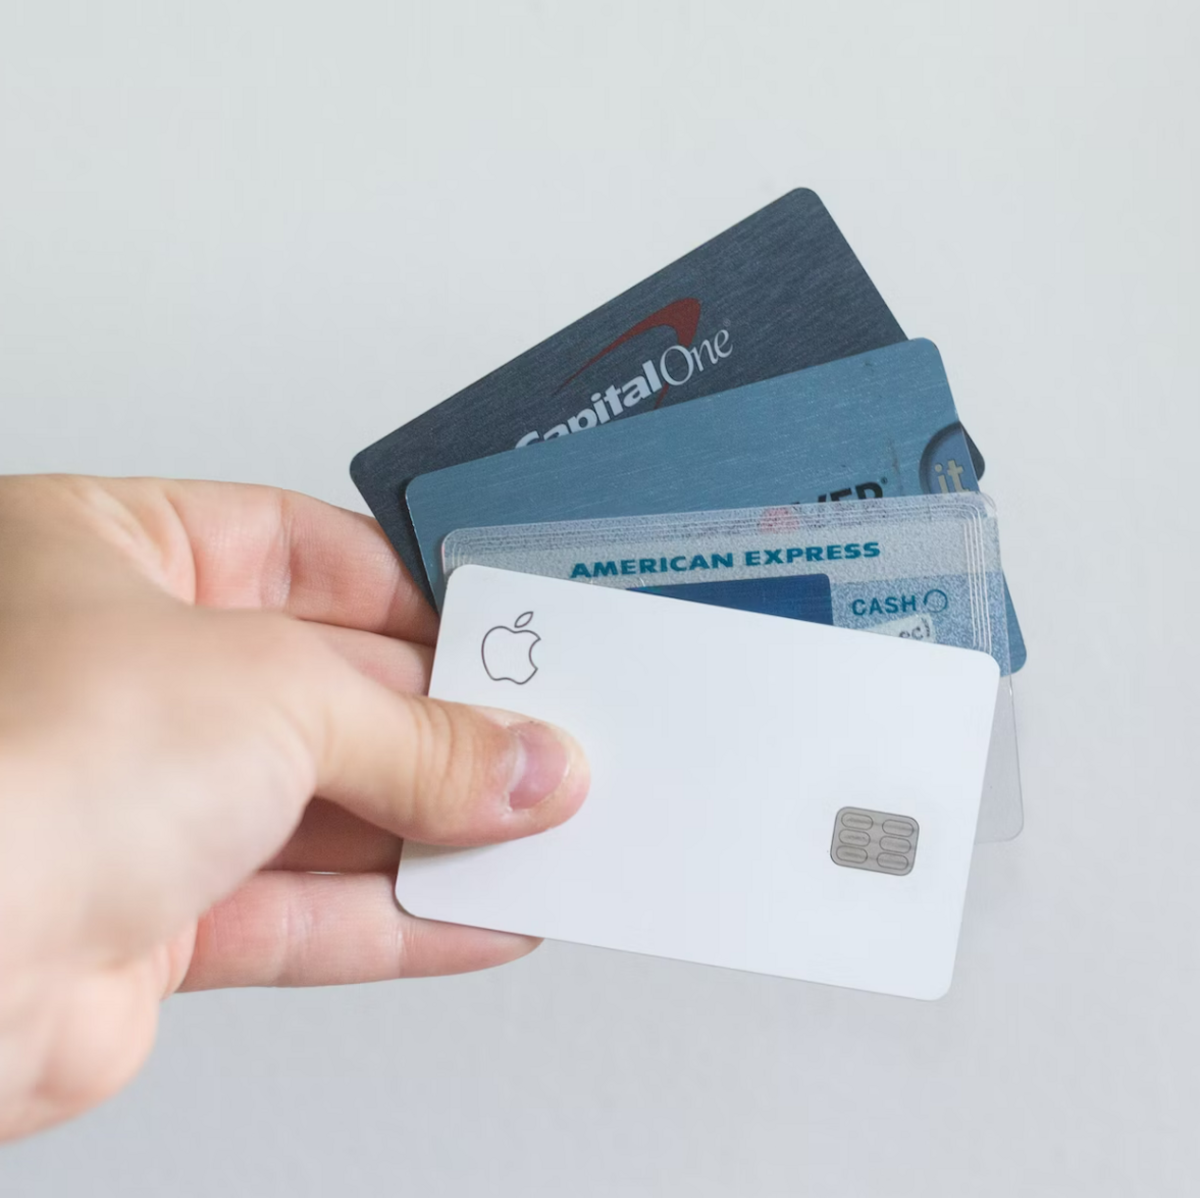

Aqui são apresentados as bibliotecas e o dataset empregado no estudo. Esse dataset está disponível no github de nossa disciplina (https://github.com/marcelozanchetta/EDS104):

In [1]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# Carregar dataset credit_score.csv disponível no github da disciplina
credit_score = pd.read_csv('/content/drive/MyDrive/Dados_Exploratorios_dataset-cvs/datasets/credit_score.csv')

Inicialmente, vamos analisar quais são as características disponíveis nesse datataset (87 features). Uma observação importante sobre esse dataset é que **não há informações** sobre rótulos das amostras investigadas.

In [ ]:
# mostra as características disponíveis do dataset
credit_score.head()



Aqui podemos observar métricas estatísticas das colunas numéricas. São calculas métricas estatísticas como contagem, média, desvio padrão, mínimo, quartis e máximo para cada coluna.

In [ ]:
credit_score.describe().T

São apresentados os nomes dos atributos das amostras investigadas no estudo:

In [ ]:
credit_score.columns

Aqui são tratados os tipos de dados de cada uma das características:

In [ ]:
credit_score.info()

Algumas características são retiradas, pois não contribuem para essa análise:

In [7]:
df_features = credit_score.drop(['CUST_ID','CAT_GAMBLING',
       'CAT_DEBT', 'CAT_CREDIT_CARD', 'CAT_MORTGAGE', 'CAT_SAVINGS_ACCOUNT',
       'CAT_DEPENDENTS', 'CREDIT_SCORE', 'DEFAULT'], axis=1)

 Vamos verificar se há valores nulos em cada coluna de um DataFrame:

In [ ]:
df_features.isnull().any()

Normalização dos atributos:

In [9]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)
df_scaled = pd.DataFrame(df_scaled,columns=df_features.columns)

Transpor de modo que cada linha seja uma característica:

In [ ]:
df_transposed = df_scaled.transpose()
np.shape(df_transposed)

---
# **Avaliação com Algoritmo de Agrupamento**
---

Vamos aplicar o algortimo hierárquico com o método Ward e distância Euclidiana:

In [ ]:
linked = linkage(df_transposed, method='ward', metric='euclidean')
np.shape(linked)

A coluna distance indica a similaridade entre os clusters combinados, enquanto a coluna size mostra o número de pontos de dados no cluster resultante.

In [ ]:
df_linked = pd.DataFrame(linked,
                         columns=['c1','c2','distance','size'])
df_linked[['c1','c2','size']] = df_linked[['c1','c2','size']].astype('int')
df_linked.head(5)

Um dendrograma para visualizar os agrupamentos:

In [ ]:
plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           labels=df_transposed.index,
           distance_sort='descending',
           show_leaf_counts=True)

plt.title('Dendrograma do agrupamento hierárquico')
plt.xlabel('Características')
plt.ylabel('Distância de Ward')

Ajuste o número de grupos como for necessário:

In [14]:
num_clusters = 10
labels = fcluster(linked, t=num_clusters, criterion='maxclust')

In [15]:
# Encontrar a correlação entre as características e o score de crédito
correlations = []
for col in df_features.columns:
    corr = credit_score['CREDIT_SCORE'].corr(credit_score[col])
    corr = round(corr, 3)
    correlations.append(corr)

In [ ]:
df_clusters = pd.DataFrame(list(zip(df_features.columns, labels, correlations)),
                           columns=['Característica','cluster','corr'])

df_clusters['abs_corr'] = df_clusters['corr'].abs()

df_clusters.sort_values(by=['cluster','abs_corr'], ascending=[True,False], inplace=True)
df_clusters.reset_index(drop=True, inplace=True)
df_clusters.head(10)

In [ ]:
df_clusters['cluster'].value_counts()

In [ ]:
c1_features = df_clusters[df_clusters['cluster']==1]['Característica'].tolist()
c2_features = df_clusters[df_clusters['cluster']==2]['Característica'].tolist()
c3_features = df_clusters[df_clusters['cluster']==3]['Característica'].tolist()

print(c1_features)
print(c2_features)
print(c3_features)

---
# **Correlação dos Agrupamentos**
---

In [ ]:
# Visualizar as correlações para os atributos nos clusters 2 e 3
corr = df_features[np.append(c2_features,c3_features)].corr()

# matriz de correlação
plt.figure(figsize=(8, 7))
sns.heatmap(corr,
            annot=True,
            cmap='coolwarm',
            linewidths=0.5,
            fmt=".1f",
            annot_kws={"size": 7},
            vmin=-1, vmax=1)
plt.title('Clusters 2 e 3')
plt.xticks(size=7)
plt.yticks(size=7)

cbar = plt.gcf().axes[-1]
cbar.tick_params(labelsize=7)
plt.xticks(size=7)
plt.yticks(size=7)

In [ ]:
# Visualizar as correlações para os atributos no cluster 3
corr = credit_score[c3_features].corr()

plt.figure(figsize=(5, 4))
sns.heatmap(corr,
            annot=True,
            cmap='coolwarm',
            linewidths=0.5,
            fmt=".1f",
            annot_kws={"size": 7},
            vmin=-1, vmax=1)
plt.title('Cluster 3')
plt.xticks(size=7)
plt.yticks(size=7)

In [ ]:
# Visualizar os atributos para o cluster 2
corr = credit_score[c2_features].corr()

plt.figure(figsize=(5, 4))
sns.heatmap(corr,
            annot=True,
            cmap='coolwarm',
            linewidths=0.5,
            fmt=".1f",
            annot_kws={"size": 7},
            vmin=-1, vmax=1)
plt.title('Cluster 2')
plt.xticks(size=7)
plt.yticks(size=7)

In [ ]:
# Visualizar os atributos para o cluster 1
corr = credit_score[c1_features].corr()

plt.figure(figsize=(5, 4))
sns.heatmap(corr,
            annot=True,
            cmap='coolwarm',
            linewidths=0.5,
            fmt=".1f",
            annot_kws={"size": 7},
            vmin=-1, vmax=1)
plt.title('Cluster 1')
plt.xticks(size=7)
plt.yticks(size=7)

---
# **Rotulação dos dados em Classes**
---

Como não há rótulos, podemos definir alguns critérios para categorizar as amostras em classes. Vamos assumir, por exemplo, como bons pagadores um critério para classes. Nesse caso, precisamos analisar os intervalos para cada grupo.

In [ ]:
credit_score.CREDIT_SCORE.value_counts()

In [ ]:
sns.histplot(credit_score['CREDIT_SCORE'])
plt.show()

Se optarmos por analisar as amostras para uma base com distribuição equilibrada de amostras teremos:

In [ ]:
# Calculando os quantis para dividir em classes
quantiles = credit_score['CREDIT_SCORE'].quantile([0, 1/3, 2/3, 1]).values

# Criando a classe com base nos quantis
credit_score['CLASS'] = pd.cut(credit_score['CREDIT_SCORE'], bins=quantiles, labels=['Baixo', 'Médio', 'Alto'])

# Exibindo as primeiras linhas do conjunto de dados com a nova coluna
print(credit_score.head())

In [ ]:
sns.histplot(credit_score['CLASS'])
plt.show()

Agora se a opção for por faixa de crédito, então, podemos aplicar esse processo. Lembre-se que esse valor pode ser definido de acordo com a necessidade de uma empresa. Esses rótulos serão usados, posteriormente, para uma comparação de desempenho entre os algoritmos de agrupamento.

In [ ]:
# Definindo os limites dos intervalos
interval_limits = [0, 500, 650, float('inf')]

# Criando a classe com base nos intervalos
credit_score['CLASS'] = pd.cut(credit_score['CREDIT_SCORE'], bins=interval_limits, labels=['Baixo', 'Médio', 'Alto'])

# Exibindo as primeiras linhas do conjunto de dados com a nova coluna
print(credit_score.head())

In [ ]:
sns.histplot(credit_score['CLASS'])
plt.show()

# **Exercícios**

1 - Implemente outro algoritmo baseado em agrupamento hierárquico para avaliar o comportamento dos grupos criados. Quantos grupos foram criados usando a outra abordagem?

2 - Basedo na criação dos rótulos, implemente uma das métricas de índice externo e avalie o desempenho dos algoritmos (Hierárquico com abordagem Ward e o algoritmo definido na questão 1). Qual dos algoritmos proporcionou os melhores resultados com base nas definições dos rótudos.

* Consulte em https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation

3 -Implemente a métrica de índice relativo de silhouette e avalie o desempenho dos algoritmos (Hierárquico com abordagem Ward e o algoritmo definido na questão 1).

In [ ]:
from sklearn.metrics import silhouette_score


4 - Implemente outro algoritmo (particional ou densidade) e faça o agrupamento dos dados baseado na regra da técnica escolhida. Lembre-se que alguns parâmetros deverão ser avaliados entre os modelos particionais (K-means) ou densidade. Com base nos rótulos definidos na questão 2, avalie o desempenho desse algoritmo usando a métrica baseada em índice externo.

 5 - Implemente a métrica de índice relativo de silhouette e avalie o desempenho do algoritmo da questão 4. Compare o resultado desse algoritmo em relação ao resultado obtido na questão 3. Qual o método que proporcionou o melhor desempenho? Faça uma discussão sobre pontos positivos e negativos observados.

In [ ]:
from sklearn.metrics import silhouette_score
